### 1.   Run the Neural Network as it is and check the accuracy
### 2.   Improve the accuracy adding more Convolution layers to your model



# Importing Libraries

In [0]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.constraints import max_norm
#import cifar10 dataset from keras
from keras.datasets import cifar10

# Preparing the dataset

Read more about cifar10 dataset here 
https://www.cs.toronto.edu/~kriz/cifar.html



In [0]:
#load the dataset
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

In [0]:
# one hot encode target values
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
# convert from integers to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

#Building the neural network model

In [0]:
model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',kernel_constraint=max_norm(3),
                                input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        #keras.layers.Dropout(0.4),
        keras.layers.Flatten(),        
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
])

In [0]:
#model compilation
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 1,050,890
Trainable params: 1,050,890
Non-trainable params: 0
_________________________________________________________________


### CustomCallback class for logging

In [0]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 5 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('acc'))
      print('Accuracy reached val is',logs.get('val_acc'))
      return

# Training the Nework

In [0]:
cc=CustomCallback()
#Train the Network with train_images and train_labels
history = model.fit(train_images, train_labels, epochs=50, batch_size=256,verbose =0,validation_data=(test_images,test_labels),
          callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.42584000001907346
Accuracy reached val is 0.5061
 Finished epoch # 5
Accuracy resched train is 0.6565
Accuracy reached val is 0.6187
 Finished epoch # 10
Accuracy resched train is 0.7248199999809265
Accuracy reached val is 0.653
 Finished epoch # 15
Accuracy resched train is 0.78018
Accuracy reached val is 0.6532
 Finished epoch # 20
Accuracy resched train is 0.824880000038147
Accuracy reached val is 0.6576
 Finished epoch # 25
Accuracy resched train is 0.865440000038147
Accuracy reached val is 0.6523
 Finished epoch # 30
Accuracy resched train is 0.9067799999809265
Accuracy reached val is 0.6555
 Finished epoch # 35
Accuracy resched train is 0.939040000038147
Accuracy reached val is 0.6557
 Finished epoch # 40
Accuracy resched train is 0.959679999961853
Accuracy reached val is 0.6494
 Finished epoch # 45
Accuracy resched train is 0.979620000038147
Accuracy reached val is 0.6462


### Plotting the Results

Text(0.5, 1.0, 'Accuracy Curves')

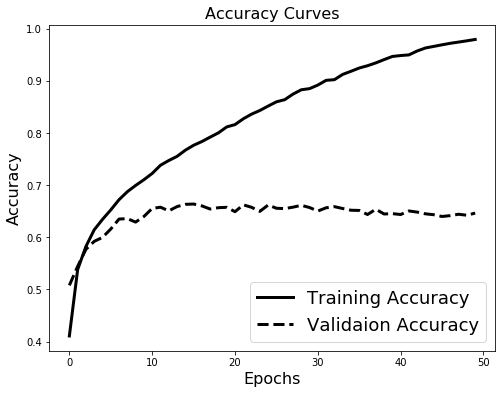

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls='--',linewidth=3.0)
plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
#printing actual accuracy... 63% only
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

0.6328


Hint: This overfitting can be avoided using Dropout
https://www.youtube.com/watch?v=bRyOi0L6Rs8

In [0]:
#add more layers
#model = keras.Sequential()
#model.add(keras.layers.Flatten())
#keras.layers.Dropout(0.5)
#keras.layers.Dense(10, activation='softmax')

#model = keras.Sequential()
#model.add(Flatten())
#model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Dropout(0.4))
#model.add(keras.layers.Dense(10, activation='softmax'))



In [0]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization


In [0]:
model = keras.Sequential([
                         
  Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
  Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
  MaxPooling2D(pool_size=(2, 2),strides=2),
  Dropout(0.2),
  Conv2D(64, kernel_size=(3, 3), activation='relu'),
  Conv2D(64, kernel_size=(3, 3), activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2, 2),strides=2),
  Dropout(0.3),
  Flatten(),
  Dense(256, activation='relu'),
  BatchNormalization(),
  Dropout(0.4),
  Dense(256, activation='relu'),
  Dense(10, activation='softmax')
  ])

In [0]:
#compile
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])


In [0]:
cc=CustomCallback()
#Train the Network with train_images and train_labels
history = model.fit(train_images, train_labels, epochs=50, batch_size=256,verbose =0,validation_data=(test_images,test_labels),
          callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.2607000000190735
Accuracy reached val is 0.3774
 Finished epoch # 5
Accuracy resched train is 0.609139999961853
Accuracy reached val is 0.5954
 Finished epoch # 10
Accuracy resched train is 0.6959400000381469
Accuracy reached val is 0.6958
 Finished epoch # 15
Accuracy resched train is 0.73706
Accuracy reached val is 0.7098
 Finished epoch # 20
Accuracy resched train is 0.760519999961853
Accuracy reached val is 0.7801
 Finished epoch # 25
Accuracy resched train is 0.7805000000190735
Accuracy reached val is 0.7839
 Finished epoch # 30
Accuracy resched train is 0.7902199999809265
Accuracy reached val is 0.7863
 Finished epoch # 35
Accuracy resched train is 0.8004199999809265
Accuracy reached val is 0.8102
 Finished epoch # 40
Accuracy resched train is 0.8072600000190735
Accuracy reached val is 0.7989
 Finished epoch # 45
Accuracy resched train is 0.814859999961853
Accuracy reached val is 0.8067


In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)       

Text(0.5, 1.0, 'Accuracy Curves')

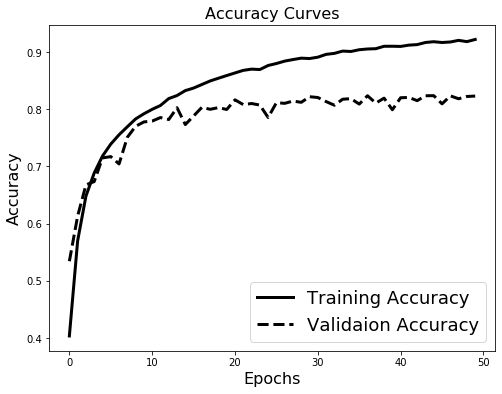

In [0]:
#plot
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls='--',linewidth=3.0)
plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [0]:
#printing actual accuracy... 82%
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

0.8137
